In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [2]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [3]:
df = utils.get_dataset()

In [4]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [5]:
df = preprocessing.impute_income_KNN(df)

In [6]:
df = df.drop(["Kidhome","Teenhome"], axis=1)

In [7]:
df.head()

,Year_Birth,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,2,58138.0,663,58,635,88,546,172,88,...,0,1,0,0,0,0,1,0,0,0
1,1954,2,46344.0,113,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,2,71613.0,312,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,2,26646.0,139,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,4,58293.0,161,94,173,43,118,46,27,...,0,0,0,0,0,1,0,0,0,0


In [8]:
seed = 0

In [80]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [95]:
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras import layers

def KerasNN(X_train, X_test, y_train, y_test, optimizer="rmsprop", loss="binary_crossentropy"):
    """
    Try to variate in optimizers & loss functions
    """
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # if we can pass a variable that indicates the amount of layers than it would be cool
    model = models.Sequential()
    model.add(layers.Dense(6, activation="relu", input_dim=30))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer, loss, metrics=["accuracy"])
    
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_predicted = model.predict(X_test)
    threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.99),iterations=10000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)
    
    print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
    print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
    print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
    print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
    print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))
    return utils.profit_share(y_pred, y_test)

In [58]:
KerasNN(X_train, X_test, y_train, y_test, optimizer="adam", loss="mean_squared_error")

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy 0.90
Area under the curve 0.85
Precision 0.60
Recall 0.77
Profit Share 0.58


0.58

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy 0.90
Area under the curve 0.85
Precision 0.60
Recall 0.79
Profit Share 0.59


0.59

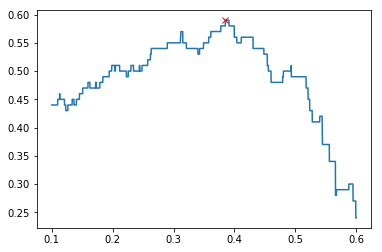

In [89]:
KerasNN(X_train, X_test, y_train, y_test, optimizer="adam", loss="mean_squared_error")

In [41]:
from imblearn import over_sampling

## Oversampling on NN

In [103]:
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

Accuracy 0.88
Area under the curve 0.79
Precision 0.65
Recall 0.66
Profit Share 0.53


0.53

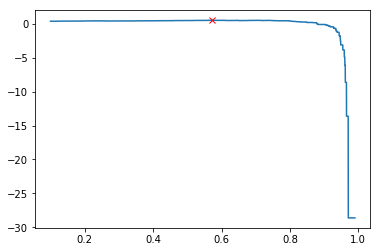

In [104]:
KerasNN(resamp_x, X_test, resamp_y, y_test)

In [98]:
ada = over_sampling.ADASYN(random_state=seed, ratio=0.7)
resamp_x, resamp_y= ada.fit_resample(X_train, y_train)

Accuracy 0.90
Area under the curve 0.83
Precision 0.64
Recall 0.74
Profit Share 0.58


0.58

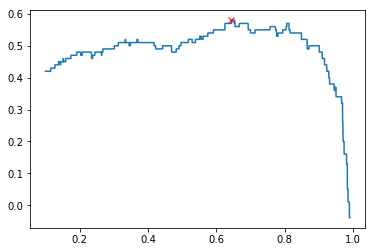

In [99]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

In [100]:
smo = over_sampling.SMOTE(random_state=seed, ratio=0.5)
resamp_x, resamp_y= smo.fit_resample(X_train, y_train)

Accuracy 0.89
Area under the curve 0.83
Precision 0.55
Recall 0.75
Profit Share 0.52


0.52

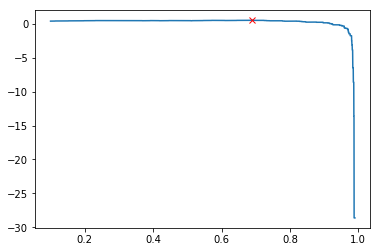

In [101]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

## Undersampling on NN

In [105]:
from imblearn import under_sampling

In [119]:
rus = under_sampling.RandomUnderSampler(random_state=seed)
resamp_x, resamp_y= rus.fit_resample(X_train, y_train)

Accuracy 0.90
Area under the curve 0.85
Precision 0.65
Recall 0.78
Profit Share 0.62


0.62

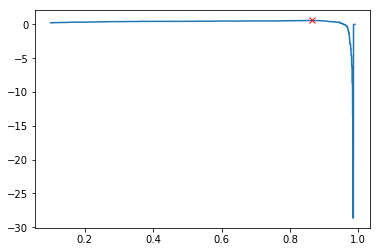

In [107]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

Accuracy 0.88
Area under the curve 0.79
Precision 0.74
Recall 0.64
Profit Share 0.56


0.56

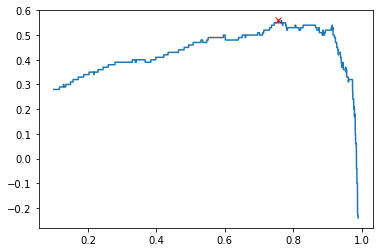

In [123]:
KerasNN(resamp_x, X_test, resamp_y, y_test)

In [108]:
tom = under_sampling.TomekLinks(random_state=seed)
resamp_x, resamp_y= tom.fit_resample(X_train, y_train)

Accuracy 0.89
Area under the curve 0.82
Precision 0.62
Recall 0.72
Profit Share 0.56


0.56

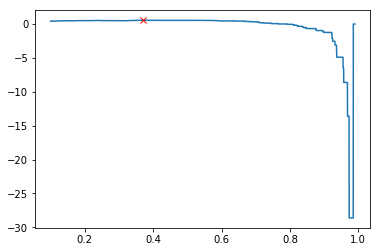

In [109]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

In [110]:
aknn = under_sampling.AllKNN(random_state=seed, n_neighbors=5)
resamp_x, resamp_y= aknn.fit_resample(X_train, y_train)

Accuracy 0.87
Area under the curve 0.78
Precision 0.74
Recall 0.62
Profit Share 0.54


0.54

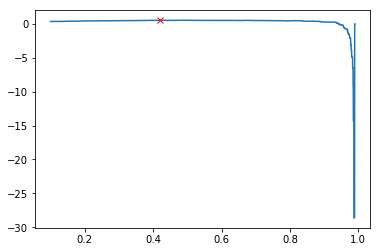

In [111]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

In [112]:
enn = under_sampling.EditedNearestNeighbours(random_state=seed, n_neighbors=3)
resamp_x, resamp_y= enn.fit_resample(X_train, y_train)

Accuracy 0.90
Area under the curve 0.86
Precision 0.59
Recall 0.80
Profit Share 0.59


0.59

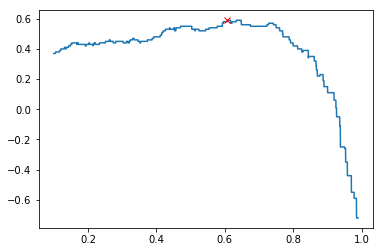

In [113]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

## Combined Methods

In [114]:
from imblearn import combine

In [115]:
smotom = combine.SMOTETomek(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotom.fit_resample(X_train, y_train)

Accuracy 0.85
Area under the curve 0.75
Precision 0.75
Recall 0.57
Profit Share 0.50


0.5

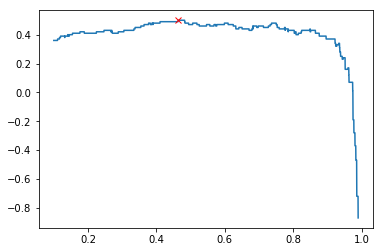

In [116]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

In [117]:
smotenn = combine.SMOTEENN(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotenn.fit_resample(X_train, y_train)

Accuracy 0.87
Area under the curve 0.78
Precision 0.61
Recall 0.64
Profit Share 0.49


0.49

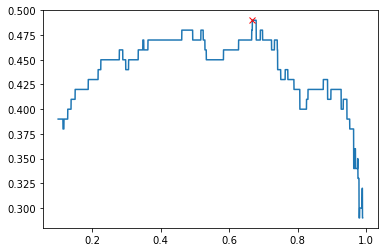

In [118]:
KerasNN(resamp_x, X_test, resamp_y, y_test, optimizer="adam", loss="mean_squared_error")

In [26]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import MinMaxScaler

In [38]:
def Gaussian_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    
    print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
    print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
    print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
    print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
    print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))
    return utils.profit_share(y_pred, y_test)

In [72]:
def Multinomial_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)
    return mnb

In [17]:
def Complement_NB(X_train, X_test, y_train, y_test):
    cnb = ComplementNB()
    cnb.
    cnb.fit(X_train, y_train)
    y_pred = cnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)

In [32]:
def Bernoulli_NB(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    # Only fit the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    return utils.profit_share(y_pred, y_test)